<a href="https://colab.research.google.com/github/neklyud/programming_miem/blob/master/nonlinear_equations_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Fixed-point iteration

Rewrite $f(x) = 0$ as $x = \phi(x)$ so that
$$f(x_*) = 0 \Leftrightarrow x_* = \phi(x_*),$$
where $x_*$ is the root of the first equation.

The simplest way of costructing $\phi(x)$ is
$$\phi(x) = x - \alpha f(x).$$

The iterative process
$$x_{n+1} = \phi(x_{n})$$
converges to the root $x_*$ if $\lim\limits_{n \rightarrow} x_n = x_*$.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$ in the form

$$
\phi(x) = x - \alpha f(x),
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$ (visualize this dependence for three different values of $epsilon$). Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval (highlight it on the plot).

In [27]:
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
plt.xkcd()

<matplotlib.pyplot.xkcd.<locals>.dummy_ctx at 0x213814122e8>

In [28]:
def f(x):
  return np.sqrt(x) - np.cos(x)

def fprime(x, sign = 1):
  return sign*(0.5/np.sqrt(x) + np.sin(x))

def fLeft(x):
  return np.sqrt(x)

def fLeftPrime(x):
  return 0.5/np.sqrt(x)

def fRight(x):
  return np.cos(x)

def fRightPrime(x):
  return -np.sin(x)


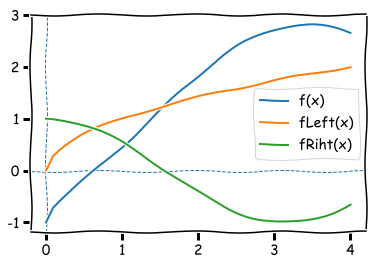

In [29]:
x = np.linspace(0, 4)
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot(x, f(x), label='f(x)')
plt.legend()
plt.plot(x, fLeft(x), label='fLeft(x)')
plt.legend()
plt.plot(x, fRight(x), label='fRiht(x)')
plt.legend()
plt.show()

# Требуется монотонный интервал на f(x)

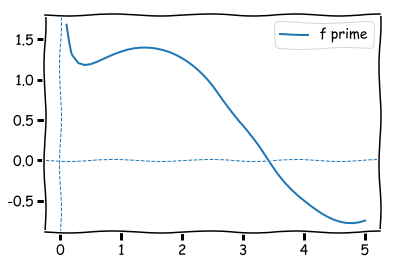

In [30]:
xpr = np.linspace(0.1, 5)
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot(xpr, fprime(xpr), label = "f prime")
plt.legend()
plt.show()

# На интервале (0, 3.5) производная больше 0, следовательно константа a должна быть положительна

In [31]:
#Находим локальные минимум и маскимум производных
from scipy.signal import argrelextrema
ext_max = argrelextrema(fprime(xpr), np.greater_equal,order=1)[0]
ext_min = argrelextrema(fprime(xpr), np.less,order=1)[0]
print(ext_max, ext_min)

[ 0 13 49] [ 3 46]


In [32]:
print(xpr[ext_max], xpr[ext_min])

[0.1 1.4 5. ] [0.4 4.7]


# Исключим точки 0.1 и 4.7. m = 0.4 M = 1.4

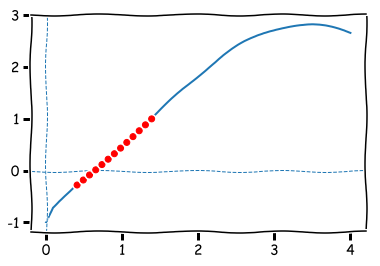

In [33]:
m = 0.4
M = 1.4
x_loc = np.where((x >= m) & (x <= M))[0].tolist()
plt.plot(x, f(x))
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot(x[x_loc], f(x[x_loc]), 'ro')

In [34]:
x_loc = x[x_loc]


In [35]:
def fixedPointIteration(m, M, a, eps):
  x0 = m
  xn = M
  it = 0
  a = a/abs(a)*a
  while 1:
    xn = x0 - a*f(x0)
    if abs(xn - x0) < eps:
      return xn, f(xn), it
    x0 = xn
    it += 1
  return xn, f(xn), it
    
print(fixedPointIteration(0.4, 1.4, 0.81, 1e-5))


(0.6417143631324816, -9.464453221141866e-09, 3)


In [36]:
def countIter(eps):
  full = []
  for i in x_loc:
    tup = fixedPointIteration(m, M, i , eps)
    full.append(tup[2])
  return full

In [37]:
full1 = countIter(10e-5)
full2 = countIter(10e-4)
full3 = countIter(10e-3)

minimum: 0.8163265306122448
minimum iteration: 2


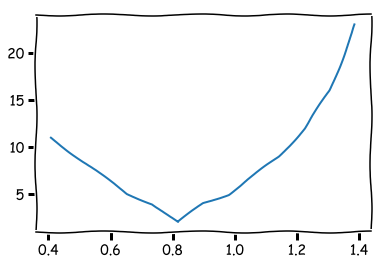

In [68]:
xx = [x_loc[i] for i in range(0, len(full1))]
yy = full1
plt.plot(xx,yy)
print('minimum:', xx[yy.index(min(yy))])
print('minimum iteration:', min(yy))

minimum: 0.8163265306122448
minimum iteration: 2


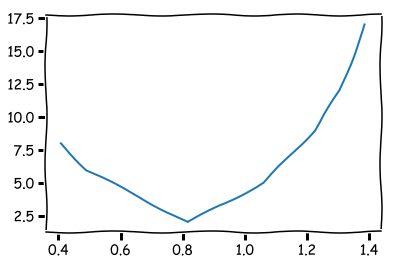

In [69]:
yy = full2
plt.plot(xx,yy)
print('minimum:', xx[yy.index(min(yy))])
print('minimum iteration:', min(yy))

minimum: 0.8163265306122448
minimum iteration: 1


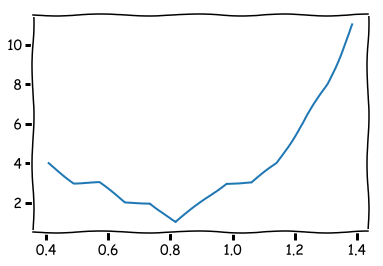

In [70]:
yy = full3
plt.plot(xx,yy)
print('minimum:', xx[yy.index(min(yy))])
print('minimum iteration:', min(yy))

In [67]:
from scipy.optimize import minimize

opt_min = minimize(fprime, 0.5, args=1, bounds=[(0.4, 1.4)], method='SLSQP')
opt_max = minimize(fprime, 0.5, args=-1, bounds=[(0.4, 1.4)], method='SLSQP',)

a = 2 / (opt_min.__getitem__('fun') - opt_max.__getitem__('fun'))
print(a)

0.7730068091741871


In [73]:
print(fixedPointIteration(0.4, 1.4, 1, 1e-3))

(0.6418329448367359, 0.00014498665781992326, 4)


# Вывод - минимальное количество итераций не зависит от выбранного a

Find the solution (and number of iterations) of the equation above using fixed-point iteration for $\alpha = 1$ and $\epsilon = 0.001$ (for Google form).

In [74]:
print(fixedPointIteration(m, M, 1, 0.001))


(0.6418329448367359, 0.00014498665781992326, 4)


# 2. Inverse quadratic interpolation

Suppose we have three different consequitive iterates $x_0$, $x_1$ and $x_2$ and a function $f(x)$: $y_i = f(x_i)$.

Construct a unique parabola which passes through $(x_i, y_i)$. Take as a next approximation, $x_3$, the root of this parabola.

In order not to solve another nonlinear equation on each step, use an inverse interpolation: construct a second order polynomial $Q(y)$ such that $Q(y_i) = x_i$. Then $x_3 = Q(0)$.



```
# This is formatted as code
```

Now, write a function which finds the solution using inverse quadratic interpolation up to a predefined accuracy $\epsilon$.

In [80]:
def inv_quad_interpolation(func, point_0, point_1, point_2, eps):
  it = 0
  xn3 = 0
  xn2 = point_2
  xn1 = point_1
  xn0 = point_0
  while 1:
    xn3 = func(xn1)*func(xn0)/((func(xn2) - func(xn1))*(func(xn2) - func(xn0)))*xn2 
    xn3 = xn3 + func(xn2)*func(xn0)/((func(xn1) - func(xn2))*(func(xn1) - func(xn0)))*xn1
    xn3 = xn3 +func(xn1)*func(xn2)/((func(xn0) - func(xn1))*(func(xn0) - func(xn2)))*xn0
    temp = xn2
    it += 1
    xn0 = xn1
    xn1 = xn2
    xn2 = xn3
    if abs(xn2 - xn1) < eps:
      break
  return xn0, xn1, xn2, it

Now implement your function to solve equation
$$x = \mbox{ctg}(x)$$
in the interval $x \in (0.5, 1)$ with $x_0 = 0.6$, $x_1 = 0.8$ and $x_2 = 1$. What is the solution for $\epsilon = 0.001$? How many iterations did it take to find it? (You will need the answers for Google Form).

In [81]:
def f(x):
  return 1/np.tan(x)

In [82]:
x = np.linspace(0.5,2, endpoint = False)
#func = dict(zip(x,f))
pnts = inv_quad_interpolation(f, 0.6, 0.8, 0.99, 0.001)

In [83]:
pnts # минимальное число итераций - 4, ответ сходится к 1.571

(1.5729661481390687, 1.5707850316846517, 1.5707963265497369, 4)

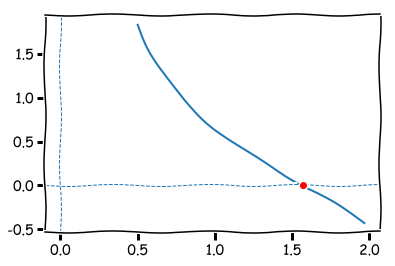

In [79]:
xx = x
yy = f(xx)
plt.plot(xx,yy)
plt.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot(pnts[0],f(pnts[0]), "ro")

# 3. Newton-Raphson method

Implement the Newton-Raphson method to solve equation $z^3 - 1 = 0$ for complex $z$. Visualize and describe the convergence domain.

In [11]:
import numpy as np
%matplotlib inline
import math
import matplotlib.pyplot as plt
def f(x):
  return x**3 - 1

def fprime(x):
  return 3*x**2

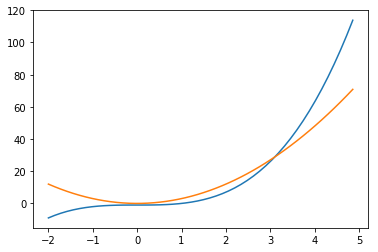

In [12]:


x = np.linspace(-2, 5, endpoint = False)
y = f(x)
fig, ax = plt.subplots()
plt.plot(x,y)
ypr = fprime(x)
plt.plot(x,ypr)
plt.show()

In [13]:
def newton_raphson(x0):
  x = []
  i = 0
  eps = 1e-5
#  x0 = complex(2,-1)
  x.append(x0)
  while True:
    x.append(-f(x[i])/fprime(x[i])+x[i])
    #print(x[i])
    i = i + 1
    if abs(x[i] - x[i-1]) < eps:
      break
  return x[i], f(x[i]), i

In [14]:
v1 = newton_raphson(2)
v2 = newton_raphson(complex(-1, -1))
v3 = newton_raphson(complex(-1, 1))

print(v1)
print(v2)
print(v3)

(1.0000000000000002, 6.661338147750939e-16, 6)
((-0.4999999999999555-0.8660254037846933j), (5.948574965941589e-13+4.977129819394577e-13j), 5)
((-0.4999999999999555+0.8660254037846933j), (5.948574965941589e-13-4.977129819394577e-13j), 5)


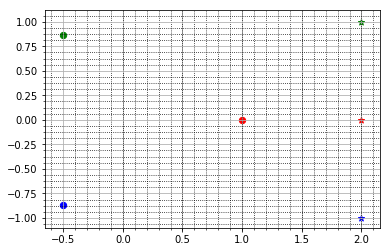

In [15]:
x1 = v1[0]
y1 = 0

x2 = v2[0].real
y2 = v2[0].imag

x3 = v3[0].real
y3 = v3[0].imag

x = 2 # первое решение получается при приближении x = 2
#plt.axvline(0.95, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.minorticks_on()
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.scatter(x, 0, color='red', s=40, marker='*')
plt.scatter(x1, y1, color='red', s=40, marker='o')

plt.scatter(2, -1, color='blue', s=40, marker='*')
plt.scatter(x2, y2, color='blue', s=40, marker='o')

plt.scatter(2, 1, color='green', s=40, marker='*')
plt.scatter(x3, y3, color='green', s=40, marker='o')
plt.grid()
plt.show()

(-1.1e-17, 1.1e-17)

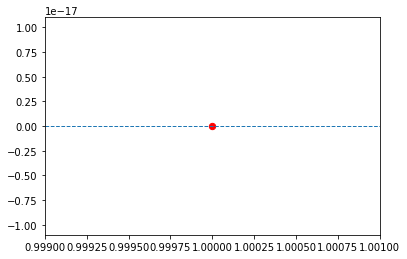

In [16]:
plt.axhline(0, ls='--', lw=1)
plt.scatter(x1, y1, color='red', s=40, marker='o')
plt.scatter(x2, y2, color='blue', s=40, marker='o')
plt.scatter(x3, y3, color='green', s=40, marker='o')
plt.xlim(0.999,1.001)
plt.ylim(-1.1e-17,1.1e-17)

In [23]:
def newton_set(width, height, zoom=1, x_off=0, y_off=0, niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)
    xa, xb, ya, yb = -2.5, 2.5, -2.5, 2.5
    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed
    # Bounding roots
    r1 = v1[0]
    r2 = v2[0]#complex(-0.5, math.sin(2*math.pi/3))
    r3 = v3[0]#complex(-0.5, -1*math.sin(2*math.pi/3))

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5
    for y in range(height):
        zy = (y + y_off) * (yb - ya) / (zoom*(height - 1)) + ya

        for x in range(width):
            zx = (x + x_off) * (xb - xa) / (zoom*(width - 1)) + xa

            # Mapping real -> complex plane
            z = complex(zx, zy)
            count = 0
            
            for i in range(niter):
                # complex numerical derivative
                dz = (fcube(z + complex(h, h)) - fcube(z)) / complex(h, h)
                if dz == 0:
                    break

                count += 1
                if count > 255:
                    break
                
                znext = z - fcube(z) / dz # Newton iteration
                if abs(znext - z) < eps: # stop when close enough to any root
                    break
                
                z = znext

            # Pixels colored using the roots
            if abs(z-r1)<eps:
                # color red
                pixels[y,x] = (255 - count*multcol, 0, 0)
            elif abs(z-r2)<=eps:
                # color green
                pixels[y,x] = (0, 255 - count*multcol, 0)
            elif abs(z-r3)<=eps:
                # color blue
                pixels[y,x] = (0, 0, 255 - count*multcol)
    return pixels

In [24]:
def fcube(z):
    return z ** 3 - 1

In [25]:
def display(width=1024, height=1024, niter=1024, zoom=1, x_off=0, y_off=0):
    """ Display a newton-raphson fractal """
    pimg = newton_set(width, height, zoom=zoom, x_off=x_off, y_off=y_off, niter=niter)
    plt.axis('off')
    plt.imshow(pimg)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


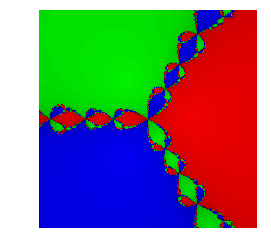

In [26]:
display()

Hint: visualize the convergence domain as a scatter plot of coloured points (the colour of the point depends on the root it converged to).